In [5]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import numpy
import sys
import codecs
import operator
import pymorphy2
import datetime
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt
import re

In [19]:
petit = 'Прошу запровадити закон про заборону експлуатації диких тварин у цирках! В наш час цирк - це одне з найбільш популярних місць для сімейного відпочинку, особливо, з маленькими дітьми. Дітям купують солодку вату, цукерки, повітряні кульки, а потім саджають на стілець і показують катування тварин. Діти сміються, бо не розуміють ситуацію, але ми, дорослі, маємо це розуміти! Чужі страждання це не привід для сміху! Тисячі тварин гинуть в жалхивих умовах від холоду, голоду та побоїв, виконуючі неприродні накази, принижуючись та терплячи знущання! Дикі тварини - не іграшки! Давайте повернемо людське обличчя Київському зоопарку! Наповнимо циркову програму гімнастами, фокусниками і клоунами, а не чужим болем і стражданням! Будь ласка, підтримайте мою ініціативу! Поширюйте це звернення у соціальних мережах і розповідайте знайомим! ЗМІНИМО ОБЛИЧЧЯ НАШОГО МІСТА РАЗОМ!'

In [20]:
def clean(text):    
    text = text.replace("\'", "'")
    text = text.replace('\n', '')
    text = text.replace('\r', '')
    return text
petit = clean(petit)

In [33]:
def numeric(text):
    
    #sentences, words and word types
    words = []
    sents = []
    for i in range(len(text)):
        words += word_tokenize(text[i])
        sents += sent_tokenize(text[i])

    nwords = len(words)
    nsents = len(sents)

    print("Number of words: ", nwords)
    print("Number of sentences: ", nsents)

    #caps detect
    caps = 0
    for i in range (0, nwords):
        if words[i] == words[i].upper():
            caps += 1
    caps_freq = caps/nwords
    print("The part of CAPS words: ", caps_freq)
    
    #the average length of the sentences
    lens = []
    for i in range (0, nsents):
        lens.append(len(sents[i]))
    avg_sent_length = numpy.mean(lens)

    #the average length of the words
    distinct_word_lengths = []    
    for i in range (0, nwords):
        distinct_word_lengths.append(len(words[i]))
    avg_word_length = numpy.mean(distinct_word_lengths)
    
    avg_sents = round(avg_sent_length/avg_word_length)
    avg_words = round(avg_word_length)

    print("The average number of words in sentences: ", avg_sents)
    print("The average lenght of words: ", avg_words)
        
    truefalse = []
    #first value - avarage number of words in sentences, for good should be > 25
    if avg_sents > 26:
        truefalse.append('True')
    else:
        truefalse.append('False')
    #second value - avarage lenght of words, for good should be > 5
    if avg_words > 5:
        truefalse.append('True')
    else:
        truefalse.append('False')
    #thrird value - frequency of CAPS words, for good should be <= 0.19
    if caps_freq > 0.19:
        truefalse.append('False')
    else:
        truefalse.append('True')
    
    return words, truefalse

words, result = numeric([petit])
print(result)

Number of words:  151
Number of sentences:  12
The part of CAPS words:  0.23178807947019867
The average number of words in sentences:  14.0
The average lenght of words:  5.0
['False', 'False', 'False']


In [8]:
with open("C:\\Users\\Olha\\Desktop\\TARTU\\_Hackathons\\Int20h\\bad_uniq.txt", "r", encoding='utf-8') as f:
    bad_uniq = (f.read()).split(' ')
with open("C:\\Users\\Olha\\Desktop\\TARTU\\_Hackathons\\Int20h\\good_uniq.txt", "r", encoding='utf-8') as f:
    good_uniq = (f.read()).split(' ')
with open("C:\\Users\\Olha\\Desktop\\TARTU\\_Hackathons\\Int20h\\intersect.txt", "r", encoding='utf-8') as f:
    intersect = (f.read()).split(' ')

In [50]:
def frequency_words(words):
    d = dict()
    #filtering
    sign = [',', '.', '-', '!', '?', ':', ';', '...', '''''' , '``', '..', '*', '—', '\'\'', '’', ')', '(', '|']
    cleaned_words = [word for word in words if word not in sign]
    
    #stemmatization
    stemmer_ = nltk.SnowballStemmer('russian')
    stemmed_words = []
    for w in cleaned_words:
        stemmed_words.append(stemmer_.stem(w))

    #delete stopwords
    with codecs.open('C:\\Users\\Olha\\Desktop\\TARTU\\_Hackathons\\Int20h\\stop_ukr.txt',encoding='cp1251') as ins:
        stop_words = ins.read()
    without_stop = [word for word in stemmed_words if word not in stop_words and len(word)>3]
    
    for i in range(len(without_stop)):
        st = without_stop[i]
        st = re.sub(r'<[^>]+>', r'',st).strip() # HTML tags
        st = re.sub(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', r'',st).strip()  # URLs 
        st = re.sub(r'(?:(?:\d+,?)+(?:\.?\d+)?)', r'',st).strip() # numbers
        without_stop[i] = st
        
    for w in without_stop:
        if w not in intersect:
            if w in d.keys():
                d[w] += 1
            else:
                d[w] = 1
    a = Counter(d)
    b = a.most_common(100)
    most_popular_ten_words = [k[0] for k in dict_[ : 10]]
    return without_stop, b, most_popular_ten_words

words, dict_, top = frequency_words(words)

The most frequent words in petition


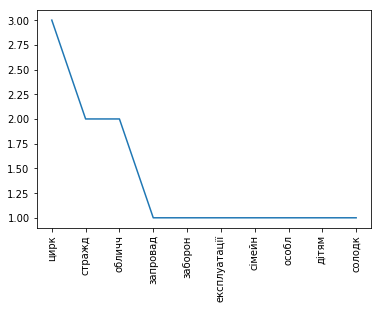

In [51]:
def plot_popular(text):
    plt.xticks(numpy.arange(len([k for k in text])), [k[0] for k in text], rotation = 90)
    plt.plot(numpy.arange(len([k for k in text])), [k[1] for k in text])
    plt.show()
print("The most frequent words in petition")
plot_popular(dict_[:10])